# Task 1: Setting the Baseline 
## Task 1.1 Data Preparation and Validation Pipeline

In [87]:
import pandas as pd 
import numpy as np

df_raw_train = pd.read_csv("C:/Users/agnie/Desktop/Agnieszka/5_semester/ML/Assignment_1/X_train.csv")
df_raw_test = pd.read_csv("C:/Users/agnie/Desktop/Agnieszka/5_semester/ML/Assignment_1/X_test.csv")

### Visualize few trajectories

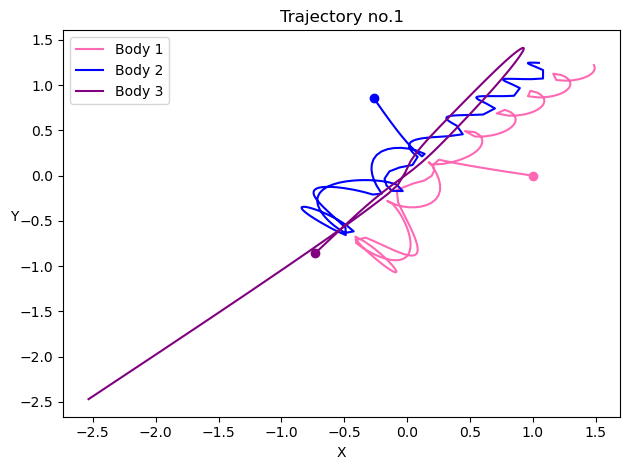

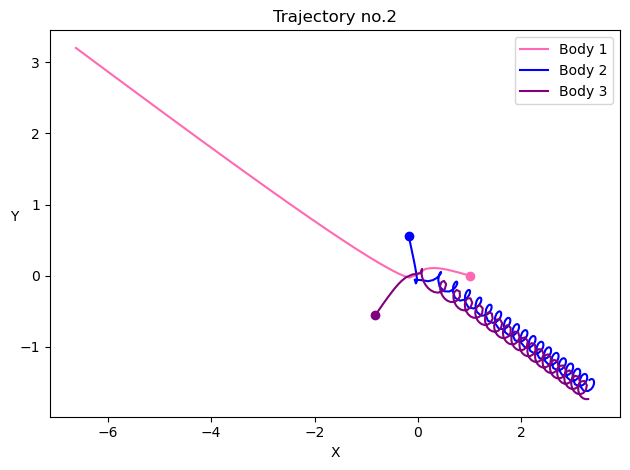

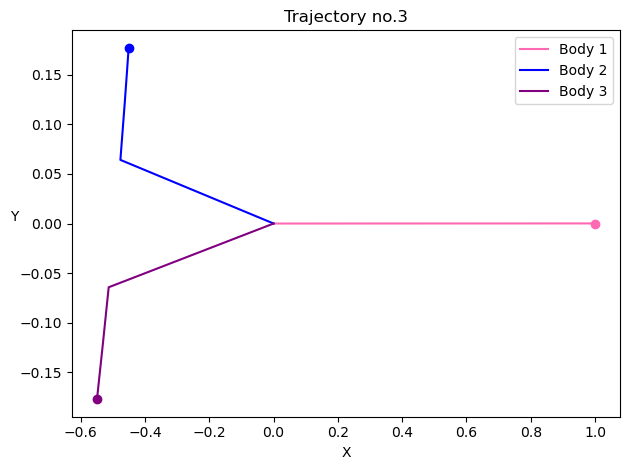

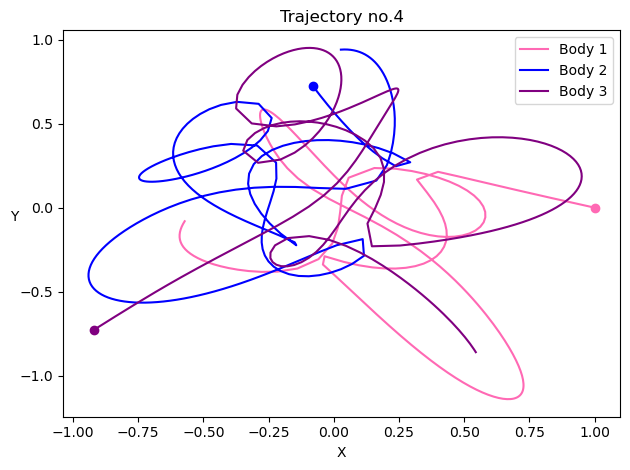

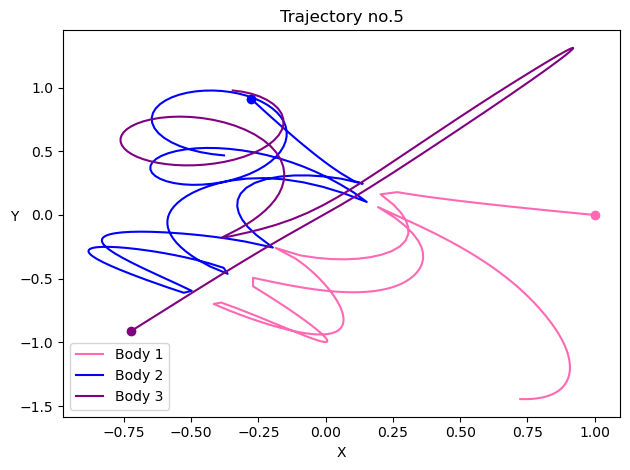

In [88]:
import matplotlib.pyplot as plt

start = 0
end = 257

for i in range(5):
    trajectory = df_raw_train[start:end]
    x1, y1, x2, y2, x3, y3 = trajectory.x_1, trajectory.y_1, trajectory.x_2, trajectory.y_2, trajectory.x_3, trajectory.y_3
    plt.plot(x1, y1, color="hotpink", label = "Body 1")
    plt.plot(x2, y2, color="blue", label = "Body 2")
    plt.plot(x3, y3, color="purple", label = "Body 3")
    plt.scatter(x1[start], y1[start], color="hotpink")
    plt.scatter(x2[start], y2[start], color="blue")
    plt.scatter(x3[start], y3[start], color="purple")
    plt.xlabel("X")
    plt.ylabel("Y", rotation=0)
    plt.title("Trajectory no." + str(i+1))
    plt.legend()
    plt.tight_layout()
    plt.show()

    start += 257
    end += 257


### Prepare the dataset

In [89]:
df_raw_train["group"] = df_raw_train["Id"]//257

In [90]:
#All starting positions
df_init = df_raw_train[ df_raw_train.index%257 == 0]

In [91]:
df_combined = df_raw_train.merge(df_init, on="group",  suffixes=('', '_init'))

# Step 1: Create a list/array of unique group_ids
unique_groups = df_combined['Id_init'].unique()

# Step 2: Create a random mask for this list
mask_train_test = np.random.rand(len(unique_groups)) < 0.8  # random True/False values

# Step 3: Split unique groups into two sets
group_train = unique_groups[mask_train_test]  # groups for the training set
group_testing = unique_groups[~mask_train_test]  # groups for the test set

# Step 4: Use the mask to split the DataFrame
train_set = df_combined[df_combined['Id_init'].isin(group_train)]
testing_set = df_combined[df_combined['Id_init'].isin(group_testing)]


unique_groups1 = testing_set['Id_init'].unique()

mask_val_test = np.random.rand(len(unique_groups1)) < 0.5

group_validation = unique_groups1[mask_val_test]  # groups for the training set
group_test = unique_groups1[~mask_val_test]  # groups for the test set

validation_set = testing_set[testing_set['Id_init'].isin(group_validation)]
test_set = testing_set[testing_set['Id_init'].isin(group_test)]



In [92]:
train_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,9.843750,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284996,9.882810,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284997,9.921880,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284998,9.960940,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743


In [93]:
validation_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
2570,0.000000,1.000000,0.000000,0.000000,0.000000,-0.278797,0.495081,0.000000,0.000000,-0.721203,...,0.0,-0.278797,0.495081,0.0,0.0,-0.721203,-0.495081,0.0,0.0,2570
2571,0.039062,0.999393,0.000081,-0.031091,0.004134,-0.278683,0.494342,0.005820,-0.037850,-0.720710,...,0.0,-0.278797,0.495081,0.0,0.0,-0.721203,-0.495081,0.0,0.0,2570
2572,0.078125,0.997570,0.000323,-0.062275,0.008268,-0.278342,0.492122,0.011615,-0.075862,-0.719228,...,0.0,-0.278797,0.495081,0.0,0.0,-0.721203,-0.495081,0.0,0.0,2570
2573,0.117188,0.994525,0.000727,-0.093648,0.012405,-0.277776,0.488411,0.017361,-0.114203,-0.716749,...,0.0,-0.278797,0.495081,0.0,0.0,-0.721203,-0.495081,0.0,0.0,2570
2574,0.156250,0.990250,0.001292,-0.125306,0.016544,-0.276987,0.483193,0.023026,-0.153048,-0.713263,...,0.0,-0.278797,0.495081,0.0,0.0,-0.721203,-0.495081,0.0,0.0,2570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,-0.291842,0.179428,0.0,0.0,-0.708158,-0.179428,0.0,0.0,1283201
1283454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,-0.291842,0.179428,0.0,0.0,-0.708158,-0.179428,0.0,0.0,1283201
1283455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,-0.291842,0.179428,0.0,0.0,-0.708158,-0.179428,0.0,0.0,1283201
1283456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,-0.291842,0.179428,0.0,0.0,-0.708158,-0.179428,0.0,0.0,1283201


In [94]:
test_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
3855,0.000000,1.000000,0.000000,0.000000,0.000000,-0.442162,0.856484,0.000000,0.000000,-0.557838,...,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
3856,0.039062,0.999555,0.000022,-0.022776,0.001135,-0.441946,0.856088,0.011048,-0.020318,-0.557609,...,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
3857,0.078125,0.998220,0.000089,-0.045592,0.002274,-0.441298,0.854897,0.022117,-0.040672,-0.556922,...,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
3858,0.117188,0.995992,0.000200,-0.068491,0.003417,-0.440217,0.852909,0.033227,-0.061101,-0.555775,...,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
3859,0.156250,0.992868,0.000356,-0.091515,0.004567,-0.438702,0.850122,0.044398,-0.081640,-0.554166,...,0.0,-0.442162,0.856484,0.0,0.0,-0.557838,-0.856484,0.0,0.0,3855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284738,9.843750,-0.408051,-0.012284,1.189426,-0.815697,-0.424418,-0.404970,-0.307460,1.010425,0.832469,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284739,9.882810,-0.361738,-0.049591,1.169348,-1.114156,-0.435557,-0.359714,-0.249920,1.326808,0.797296,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284740,9.921880,-0.318596,-0.101519,0.993035,-1.583569,-0.441999,-0.299089,-0.032856,1.816586,0.760596,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284741,9.960940,-0.292853,-0.176693,0.083473,-2.268009,-0.429385,-0.214368,0.920770,2.524340,0.722238,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486


### Verify dataset splitting

In [95]:
# Get sorted unique Id_init values
unique_sorted_ids_train = sorted(set(train_set['Id_init'].values))
unique_sorted_ids_val = sorted(set(validation_set['Id_init'].values))
unique_sorted_ids_test = sorted(set(test_set['Id_init'].values))

# Find intersection of the two sets
intersection_ids1 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_val))
intersection_ids2 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_test))
intersection_ids3 = sorted(set(unique_sorted_ids_test) & set(unique_sorted_ids_val))

# Display the results]
print("Intersection of IDs:", intersection_ids1)
print("Intersection of IDs:", intersection_ids2)
print("Intersection of IDs:", intersection_ids3)

Intersection of IDs: []
Intersection of IDs: []
Intersection of IDs: []


In [96]:
input_train = train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_validation = validation_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]

input_train.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
0,0.000000,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
1,0.039062,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
2,0.078125,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
3,0.117188,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
4,0.156250,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196


In [48]:
input_validation.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
1799,0.000000,1.0,0.0,-0.110829,0.699539,-0.889171,-0.699539
1800,0.039062,1.0,0.0,-0.110829,0.699539,-0.889171,-0.699539
1801,0.078125,1.0,0.0,-0.110829,0.699539,-0.889171,-0.699539
1802,0.117188,1.0,0.0,-0.110829,0.699539,-0.889171,-0.699539
1803,0.156250,1.0,0.0,-0.110829,0.699539,-0.889171,-0.699539


In [97]:
output_train = train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_validation = validation_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]

output_train.head()

,x_1,y_1,x_2,y_2,x_3,y_3
0,1.000000,0.000000,-0.266467,0.859196,-0.733533,-0.859196
1,0.999548,0.000092,-0.266261,0.858781,-0.733287,-0.858874
2,0.998190,0.000370,-0.265641,0.857535,-0.732549,-0.857905
3,0.995925,0.000833,-0.264606,0.855456,-0.731318,-0.856289
4,0.992747,0.001483,-0.263154,0.852540,-0.729592,-0.854022


In [14]:
output_validation.head()


,x_1,y_1,x_2,y_2,x_3,y_3
2313,1.000000,0.000000,-0.295683,0.250215,-0.704317,-0.250215
2314,0.999315,0.000046,-0.296412,0.248714,-0.702904,-0.248759
2315,0.997259,0.000182,-0.298623,0.244179,-0.698636,-0.244361
2316,0.993826,0.000406,-0.302402,0.236514,-0.691424,-0.236920
2317,0.989006,0.000714,-0.307905,0.225543,-0.681102,-0.226257


In [98]:
groups = train_set["group"]
groups

0             0
1             0
2             0
3             0
4             0
           ... 
1284995    4999
1284996    4999
1284997    4999
1284998    4999
1284999    4999
Name: group, Length: 1012580, dtype: int64

#### Function to save predictions to csv


In [16]:
def save_predictions_to_csv(predictions: np.ndarray, output_file_name: str):

    """
    Saves the given NumPy array with predictions to a CSV file.

    Parameters:
    - predictions (np.ndarray): A NumPy array containing the data to be saved.
    - output_file_name (str): The name of the output CSV file (without .csv extension).
    """

    predictions_df = pd.DataFrame(predictions, columns=["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"])
    predictions_df.insert(0, 'Id', range(len(predictions_df)))
    predictions_df.to_csv("./output/csv/"+output_file_name+".csv", index=False)

## Task 1.2 Learn the baseline model

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(random_state=1, max_iter=3)
svm = SVR(kernel="linear")
model = LinearRegression()
modelRidge = Ridge()
modelLasso = Lasso()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelRidge)
    ])
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('model', Ridge())])

In [56]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GroupKFold

    
pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
rmse = root_mean_squared_error(output_validation, y_hat)

print("RMSE: ", rmse)

RMSE:  1.2214683317471522


In [21]:
import numpy as np

def plot_y_yhat(y_validation, y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_validation) > MAX:
        idx = np.random.choice(len(y_validation),MAX, replace=False)
    else:
        idx = np.arange(len(y_validation))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_validation[idx,i])
        x1 = np.max(y_validation[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_validation[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig("./output/plots/"+plot_title+'.pdf')
    plt.show()

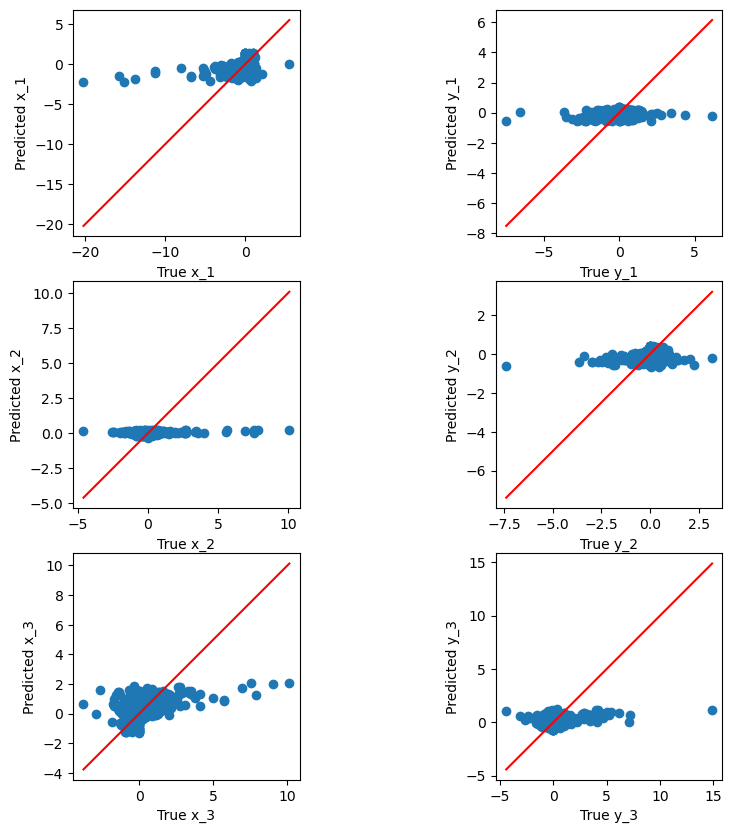

In [22]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy())


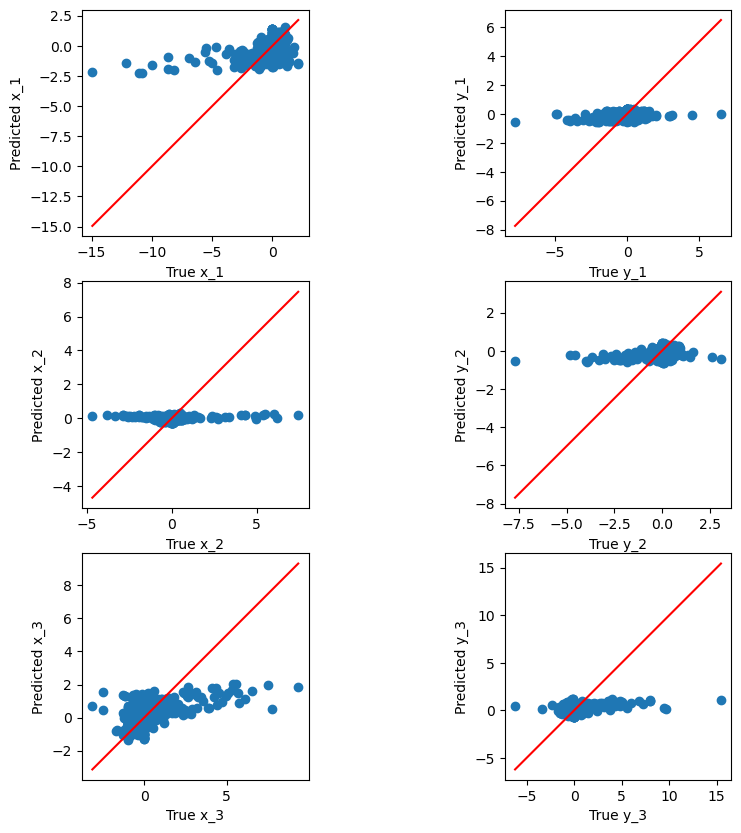

In [23]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy())

# Task 2: Nonlinear models on the data — the Polynomial Regression model
## Task 2.1 Development

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

def validate_poly_regression(X_train, y_train, X_val, y_val, regressor=None, degrees=range(1,10), max_features=None):
    
    best_rsme = 1000
    best_degree = 0
    train_scores = []
    validation_scores = []
    n_features_list = []

    for d in degrees:
        print("Degree ", d)

        pipe_d_degree= Pipeline(
    [       ('preprocessor', PolynomialFeatures(degree=d)),
            ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
    ])

        pipe_d_degree.fit(X_train, y_train)

        n_features = pipe_d_degree.named_steps['preprocessor'].n_output_features_
        n_features_list.append(n_features)

        y_train_predict = pipe_d_degree.predict(X_train)
        y_val_predict = pipe_d_degree.predict(X_val)


        train_error = root_mean_squared_error(y_train, y_train_predict)
        # print("Train RMSE:", train_error)

        val_error = root_mean_squared_error(y_val, y_val_predict)
        print("Val RMSE:", val_error)

        if val_error < best_rsme:
            best_rsme = val_error
            best_degree = d

        train_scores.append(train_error)
        validation_scores.append(val_error)

    return train_scores, validation_scores, best_rsme, best_degree, n_features_list

In [25]:
degrees=range(1,5)
degree_scores = {d: {'train_scores': [], 'test_scores': []} for d in degrees}
best_rsmes = []
best_degrees = []

for _ in range(2):

    sample_train_set = train_set.sample(frac=0.000001)
    sample_input_train = sample_train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
    sample_output_train = sample_train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
    
    train_scores, validation_scores, best_rsme, best_degree, n_features_list = validate_poly_regression(sample_input_train, sample_output_train, input_validation, output_validation, degrees=degrees)

    best_rsmes.append(best_rsme)
    best_degrees.append(best_degree)

    for d in degrees:
        degree_scores[d]['train_scores'].append(train_scores[d-1])
        degree_scores[d]['test_scores'].append(validation_scores[d-1])

# Save best RMSEs and degrees to CSV
df_best = pd.DataFrame({
    'best_degree': best_degrees,
    'best_rsme': best_rsmes
})
df_best.to_csv('./output/csv/PR_best_rsme_degrees.csv', index=False)

Degree  1
Val RMSE: 2.4244016681705616
Degree  2
Val RMSE: 2.4244016681705616
Degree  3


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2057: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2057: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2057: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2


Val RMSE: 2.4244016681705616
Degree  4


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2057: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2


Val RMSE: 2.4244016681705616
Degree  1
Val RMSE: 1.5208590829055886
Degree  2
Val RMSE: 1.5208590829055886
Degree  3


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2057: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2057: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2
c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2057: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2


Val RMSE: 1.5208590829055886
Degree  4


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2057: RuntimeWarning: invalid value encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2


Val RMSE: 1.5208590829055886


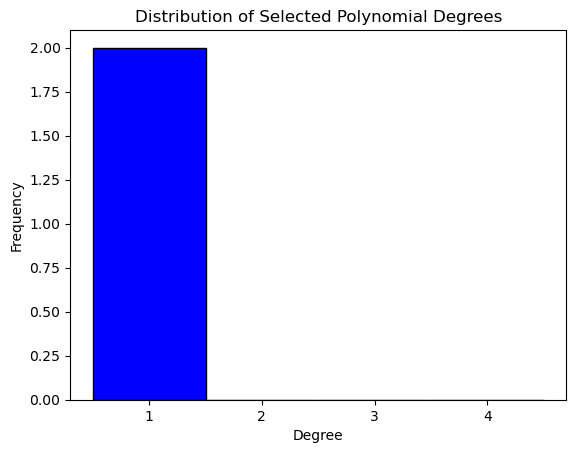

In [26]:
import matplotlib.pyplot as plt

# Create bin edges so that each bar is centered on its respective integer
bin_edges = [i - 0.5 for i in range(1, len(degrees) + 2)]  # Create bin edges

plt.hist(best_degrees, bins=bin_edges, color='blue', edgecolor='black')

plt.xticks(range(1, len(degrees) + 1))

plt.title('Distribution of Selected Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.show()

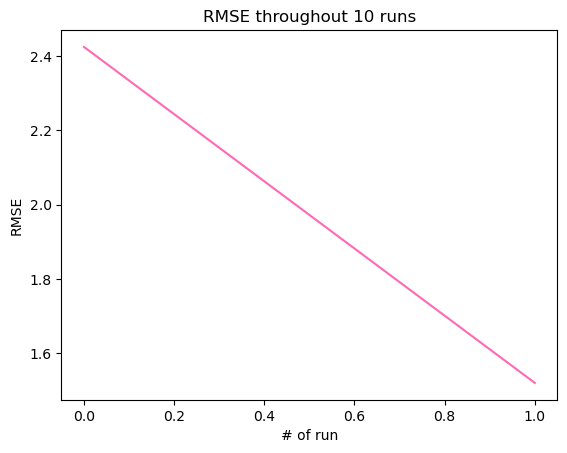

In [27]:
plt.plot(best_rsmes, color='hotpink')
plt.title('RMSE throughout 10 runs')
plt.xlabel('# of run')
plt.ylabel('RMSE')
plt.show()

### Train with the best-degree model


In [28]:
best_degree_ever = max(set(best_degrees), key=best_degrees.count)

print("Best degree", best_degree_ever)

pipe_best_degree= Pipeline(
[       ('preprocessor', PolynomialFeatures(degree=best_degree_ever)),
        ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

pipe_best_degree.fit(input_train, output_train)

output_train_predict = pipe_best_degree.predict(input_train)
output_val_predict = pipe_best_degree.predict(input_validation)

train_error = root_mean_squared_error(output_train, output_train_predict)
print("Train RMSE:", train_error)

val_error = root_mean_squared_error(output_validation, output_val_predict)
print("Validation RMSE:", val_error)

Best degree 1
Train RMSE: 1.276299130139402
Validation RMSE: 1.2218077367915208


## Task 2.2 Evaluation

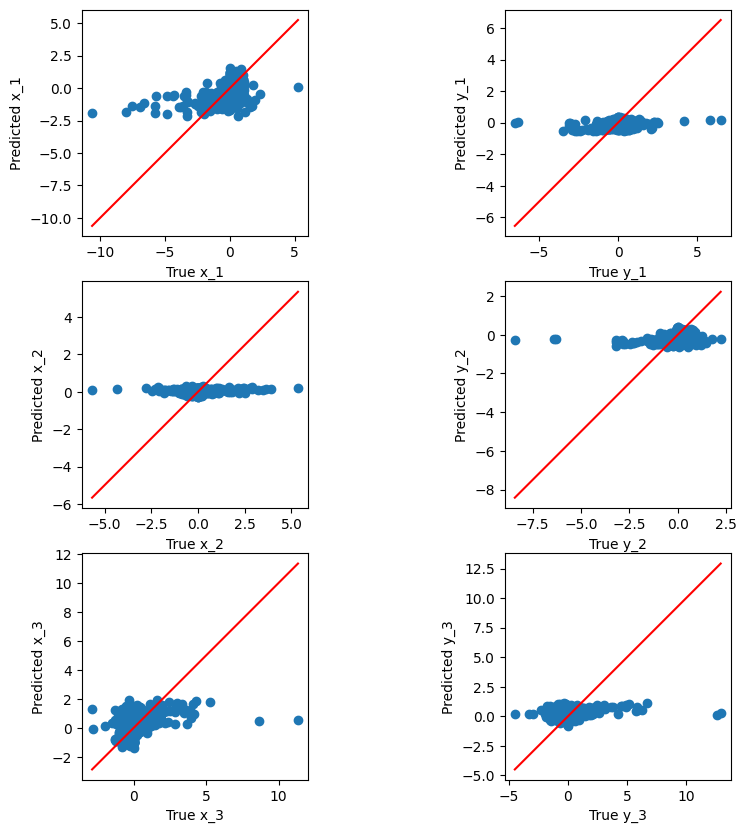

In [178]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(output_val_predict).to_numpy())

# Task 3: Feature Engineering
## Task 3.1 Removing variables

### Seaborn plot

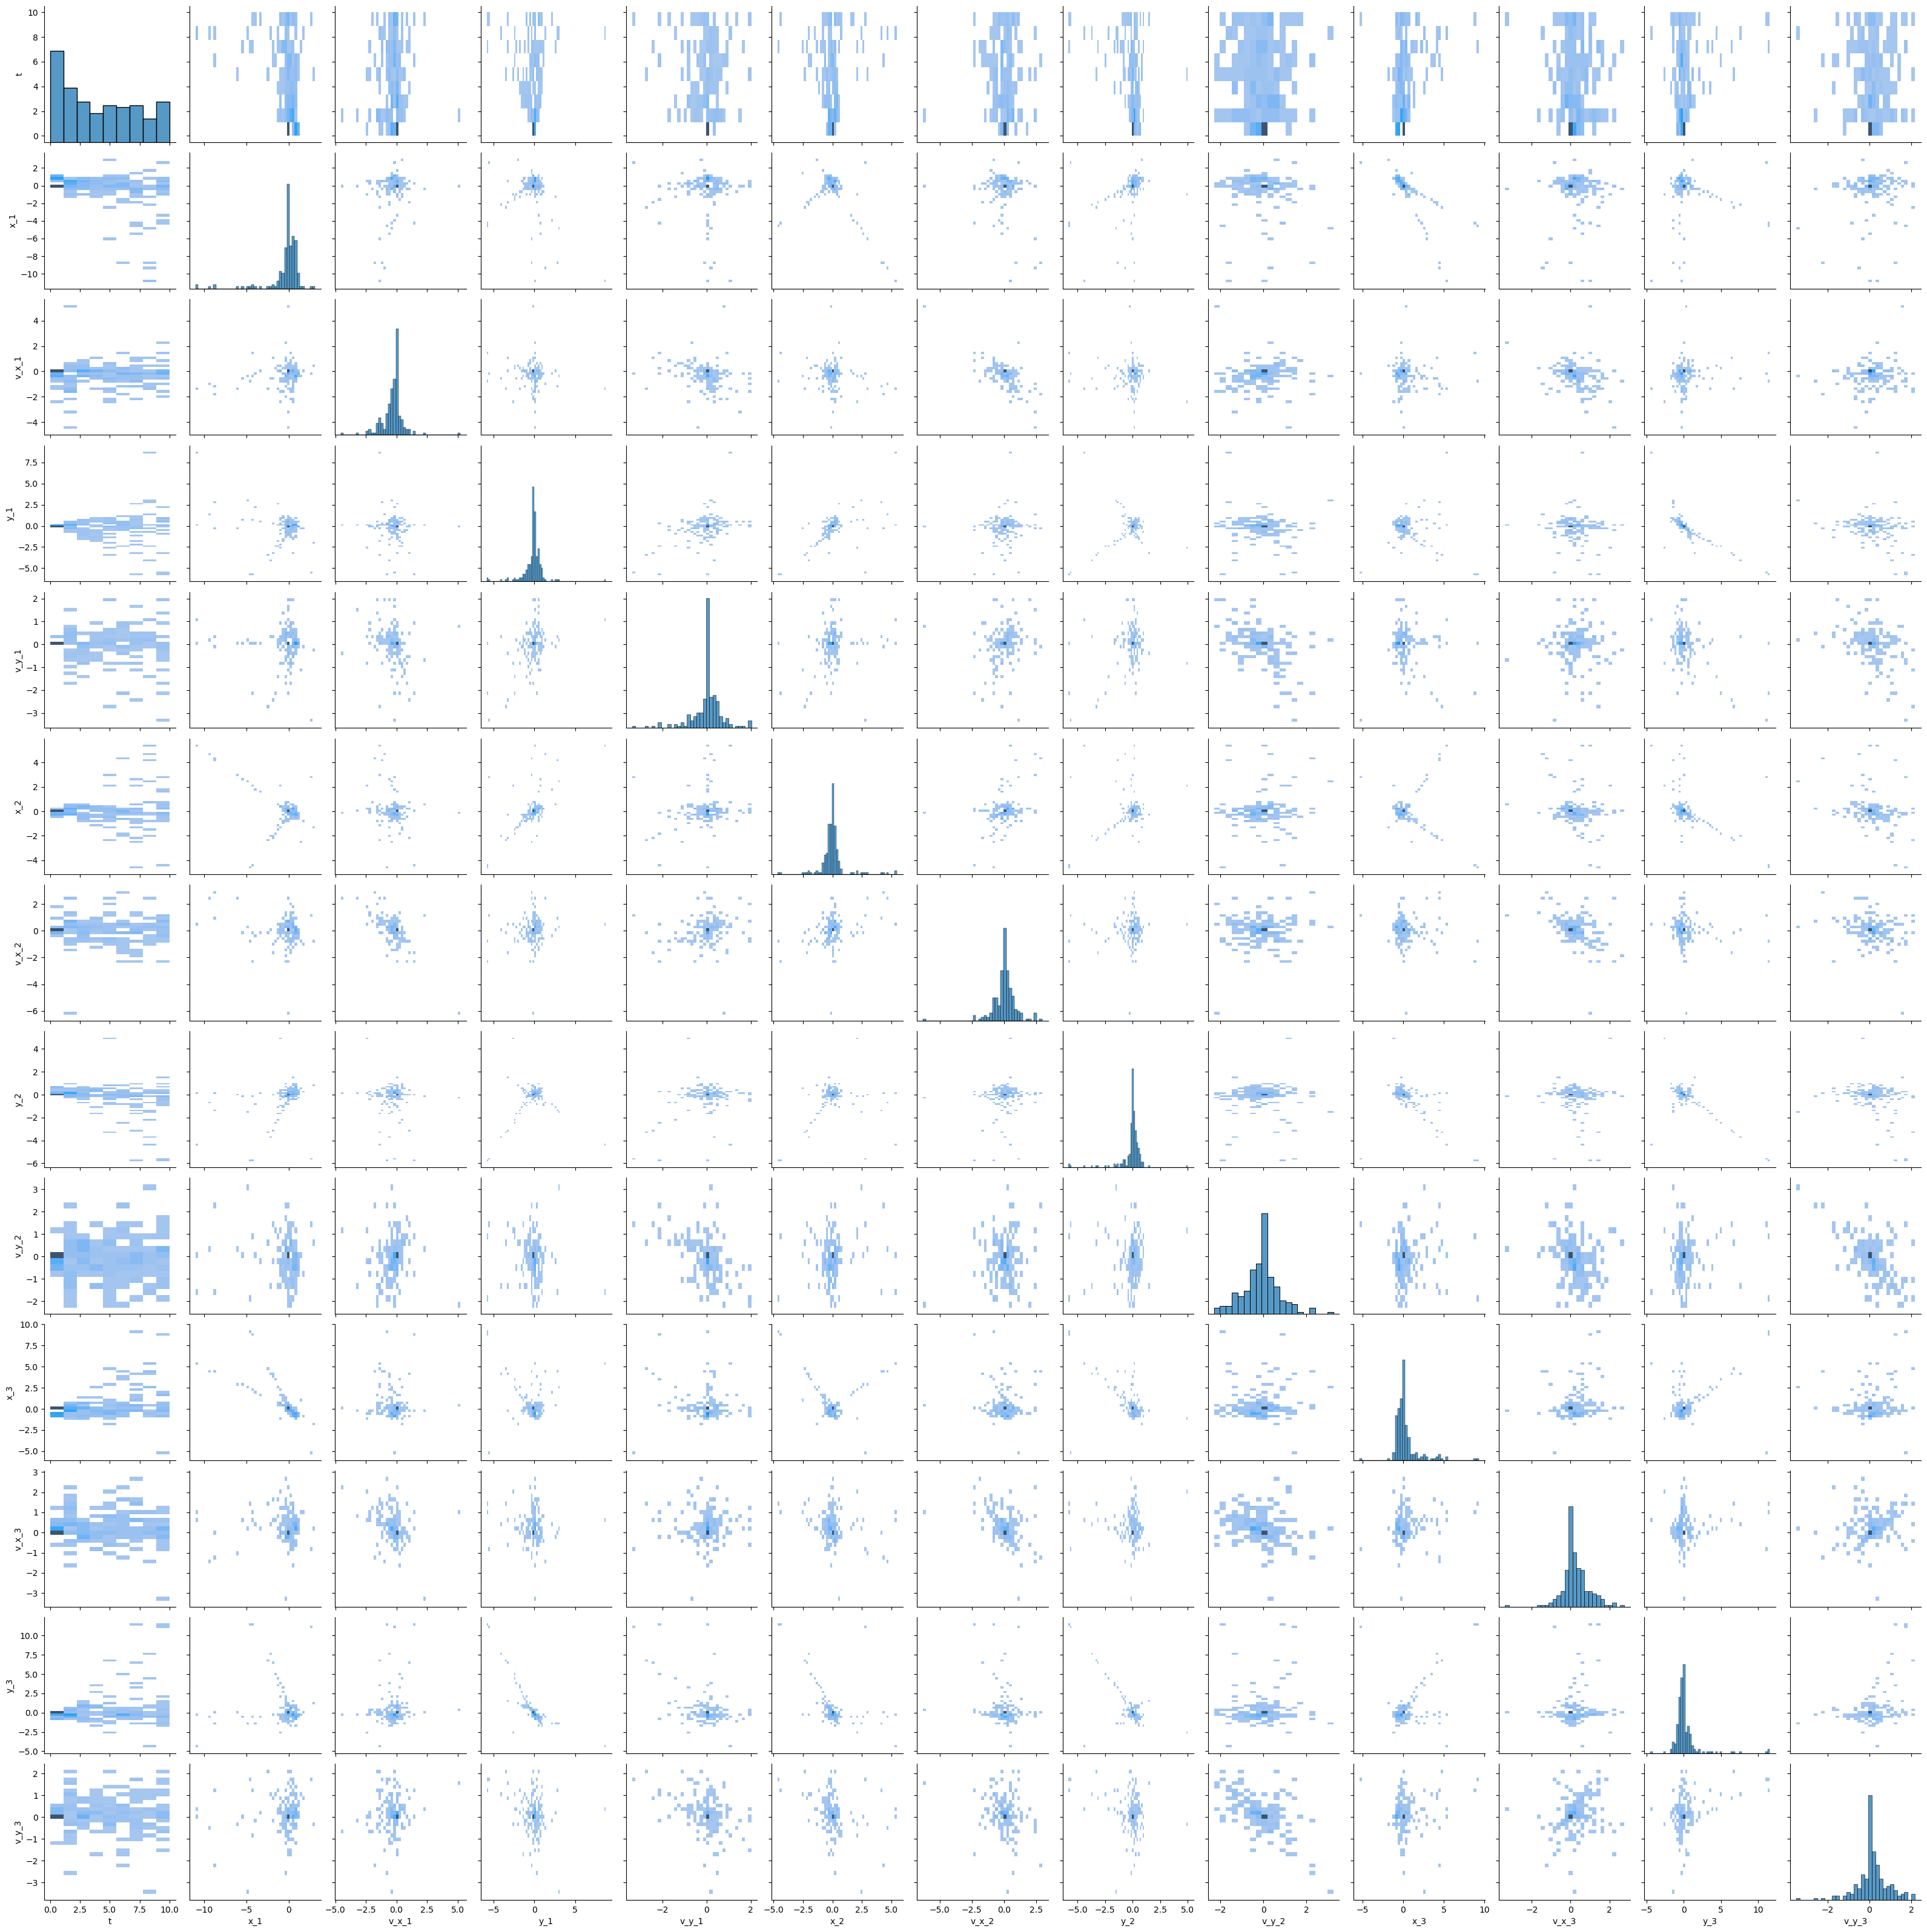

In [29]:
import seaborn as sns

df_train=train_set[["t","x_1", "v_x_1", "y_1","v_y_1", "x_2", "v_x_2", "y_2", "v_y_2", "x_3", "v_x_3", "y_3", "v_y_3"]]

sns.pairplot(df_train.sample(200), kind="hist")

### Check linear corelations

<Axes: >

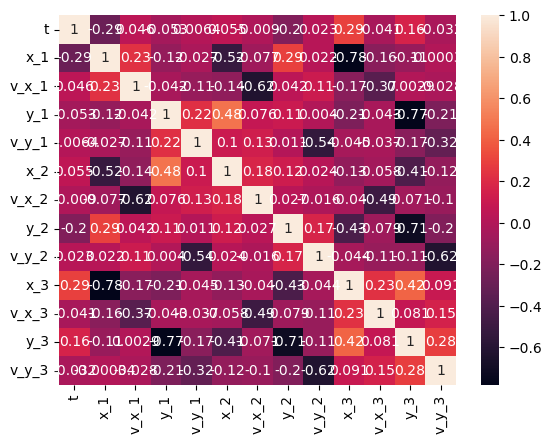

In [99]:
# Correlation map

corr = df_train.corr()
sns.heatmap(corr,annot=True)

In [101]:
# Get the absolute values of the correlations, unstack and sort them

abs_corr = corr.abs()

# Sort by absolute values, and exclude self-correlations (correlation of 1)
sorted_corr = abs_corr.unstack().sort_values(ascending=False)
sorted_corr = sorted_corr[sorted_corr < 1]

sorted_corr

avg_corr = {'t':0,'x_1':0,'x_2':0,'x_3':0,'y_1':0,'y_2':0,'y_3':0}

for key in avg_corr.keys():
    lst = []
    for item in sorted_corr.items():
        if item[0][0] == key:
            lst.append(item[1])
    if len(lst) != 0:
        avg_corr[key]=sum(lst)/len(lst)

sort_corr=dict(sorted(avg_corr.items(), key=lambda item: item[1],reverse=True))
sort_corr



{'y_3': 0.2746233711936625,
 'x_3': 0.2406086565210259,
 'x_1': 0.2184117446961693,
 'y_2': 0.19865098149697794,
 'y_1': 0.19522679056926204,
 'x_2': 0.19484137480349362,
 't': 0.10052788450767901}

<Axes: >

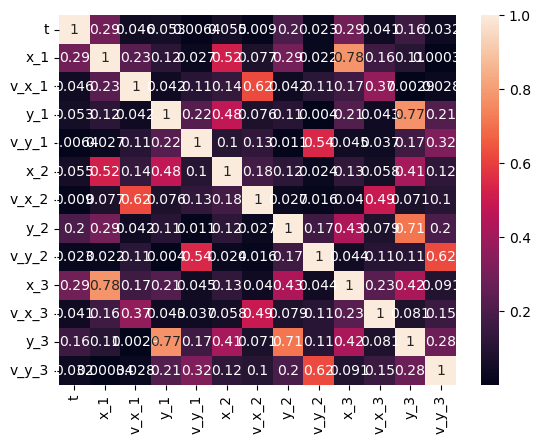

In [102]:
# Correlation map with absolute values

sns.heatmap(corr.abs(),annot=True)

In [103]:
#Take again baseline model: pipeline with StandardScaler and modelRidge (Task 1.1)

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import math

modelRegression = LinearRegression()
pipe1 = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelRidge)
    ])

new_input=input_train[["t","x_1_init","y_1_init","x_2_init", "y_2_init","y_3_init"]]
pipe1.fit(new_input, output_train)
y_hat = pipe1.predict(input_validation[["t","x_1_init","y_1_init","x_2_init", "y_2_init","y_3_init"]])
mse = mean_squared_error(output_validation, y_hat, squared = False)
#rmse = root_mean_squared_error(output_validation, y_hat)
print(mse)
print("RMSE: ", math.sqrt(mse))



1.2632644576725263
RMSE:  1.1239503804316835


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [104]:
# 
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import math

modelRegression1 = LinearRegression()
pipe2 = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelRegression1)
    ])

    
pipe2.fit(input_train[["t","y_1_init","x_2_init", "y_2_init"]], output_train)
y_hat1 = pipe2.predict(input_validation[["t","y_1_init","x_2_init", "y_2_init"]])
mse1 = mean_squared_error(output_validation, y_hat1, squared = False)
#rmse = root_mean_squared_error(output_validation, y_hat)
print(mse1)
print("RMSE: ", math.sqrt(mse1))



1.2632694330457164
RMSE:  1.1239525937715151


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [105]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

pipe3 = Pipeline(
    [('scaling', MinMaxScaler()), 
    ("model", LinearRegression())

    ]
)
pipe3.fit(input_train[["t","x_1_init","y_1_init","x_2_init", "y_2_init","x_3_init","y_3_init"]], output_train)
y_hat3 = pipe3.predict(input_validation[["t","x_1_init","y_1_init","x_2_init", "y_2_init","x_3_init","y_3_init"]])
mse3 = mean_squared_error(output_validation, y_hat3, squared = False)
#rmse = root_mean_squared_error(output_validation, y_hat)
print(mse3)
print("RMSE: ", math.sqrt(mse3))


1.2632162524520267
RMSE:  1.1239289356769968


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [106]:
# QuantileTransformer
from sklearn.preprocessing import QuantileTransformer

pipe4 = Pipeline(
    [('scaling', QuantileTransformer()), 
    ("model", LinearRegression())

    ]
)
pipe4.fit(input_train[["t","x_1_init","y_1_init","x_2_init", "y_2_init","x_3_init","y_3_init"]], output_train)
y_hat4 = pipe4.predict(input_validation[["t","x_1_init","y_1_init","x_2_init", "y_2_init","x_3_init","y_3_init"]])
mse4 = mean_squared_error(output_validation, y_hat4, squared = False)
#rmse = root_mean_squared_error(output_validation, y_hat)
print(mse4)
print("RMSE: ", math.sqrt(mse4))

1.269641723107782
RMSE:  1.1267837960797014


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [107]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

pipe5 = Pipeline(
    [('scaling', RobustScaler()), 
    ("model", LinearRegression())

    ]
)
pipe5.fit(input_train[["t","x_1_init","y_1_init","x_2_init", "y_2_init","x_3_init","y_3_init"]], output_train)
y_hat5 = pipe5.predict(input_validation[["t","x_1_init","y_1_init","x_2_init", "y_2_init","x_3_init","y_3_init"]])
mse5 = mean_squared_error(output_validation, y_hat5, squared = False)
#rmse = root_mean_squared_error(output_validation, y_hat)
print(mse5)
print("RMSE: ", math.sqrt(mse5))

1.2631941178606165
RMSE:  1.123919088662799


c:\Users\agnie\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Task 3.2 Evaluation of Variable Reduction

## Task 3.3 Adding Variables

## Task 3.4 Evaluation of Variable Augmentation

# Task 4: Nonparamentric Model — the k-Nearest Neighbors Regressor
## Task 4.1 Development

In [179]:
    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import time

In [180]:
analytics = []
def validate_knn_regression(X_train, y_train, X_val, y_val, k=range(1,15)):
    for n_neighbors in k:
        pipe = Pipeline(
            [
                    ('scaling', StandardScaler()), 
                    ("model", KNeighborsRegressor(n_neighbors=n_neighbors))
            ])
        start_time = time.time()

        pipe.fit(X_train, y_train)
        y_hat = pipe.predict(X_val)
        elapsed_time = time.time() - start_time
        rmse = root_mean_squared_error(y_hat, y_val)

        print(f'k: {n_neighbors} with RMSE: {rmse}, time: {elapsed_time}')
        analytics.append([n_neighbors, rmse, elapsed_time])

validate_knn_regression(input_train, output_train, input_validation, output_validation, k=range(1,15))

k: 1 with RMSE: 0.9730091863603992, time: 2.9782841205596924
k: 2 with RMSE: 0.9536075614087688, time: 2.947843074798584
k: 3 with RMSE: 0.9557921434202683, time: 3.011888027191162
k: 4 with RMSE: 0.9138386003587663, time: 2.989165782928467
k: 5 with RMSE: 0.897822205123148, time: 3.0839529037475586
k: 6 with RMSE: 0.8717505217310121, time: 3.1454689502716064
k: 7 with RMSE: 0.8673023029388739, time: 3.216588020324707
k: 8 with RMSE: 0.8589874961089815, time: 3.2980222702026367
k: 9 with RMSE: 0.8443015850001389, time: 3.4032082557678223
k: 10 with RMSE: 0.8281924530323398, time: 3.4298009872436523
k: 11 with RMSE: 0.823243282557566, time: 3.5214760303497314
k: 12 with RMSE: 0.8228800653696093, time: 3.5854201316833496
k: 13 with RMSE: 0.8178407771898436, time: 3.6446120738983154
k: 14 with RMSE: 0.811739468113243, time: 3.7240891456604004


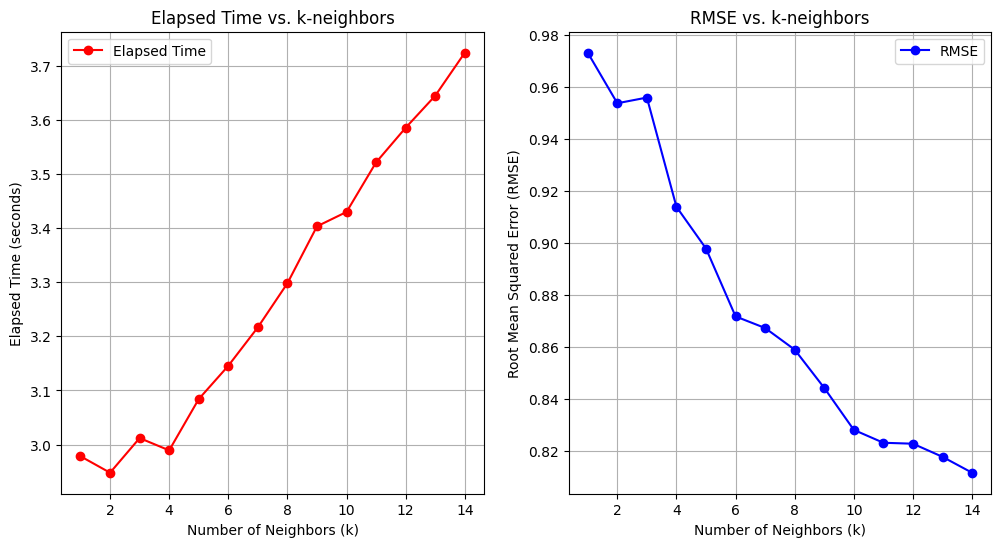

In [181]:
# Extract data for plotting
k_values = [item[0] for item in analytics]
rmse_values = [item[1] for item in analytics]
time_values = [item[2] for item in analytics]

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot elapsed time vs. k-neighbors
plt.subplot(1, 2, 1)
plt.plot(k_values, time_values, marker='o', linestyle='-', color='r', label='Elapsed Time')
plt.title('Elapsed Time vs. k-neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Elapsed Time (seconds)')
plt.grid(True)
plt.legend()

# Plot RMSE vs. k-neighbors
plt.subplot(1, 2, 2)
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b', label='RMSE')
plt.title('RMSE vs. k-neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.legend()
plt.savefig('knn'+'.pdf')
plt.show()

## Task 4.2 Evaluation

# Task 5 [Optional]